## Importing the libraries

In [75]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [76]:
dataset = pd.read_csv('new_churn_data.csv')

## Exploring the dataset

In [77]:
dataset.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [78]:
dataset.tail()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
26991,24291,1,24.0,R,0,0,0,0,0,81,...,Weekly,0,0,0,0,Leo,0,0,1.07,1
26992,4116,1,26.0,na,0,0,2,0,0,1,...,Bi-Weekly,0,0,0,1,Cancer,1,0,0.67,0
26993,23740,0,22.0,na,0,0,37,0,0,98,...,Bi-Weekly,0,0,0,0,Taurus,0,0,0.93,0
26994,47663,1,46.0,na,2,0,16,2,0,58,...,Semi-Monthly,0,0,0,0,Aries,1,0,0.90,1
26995,52752,1,34.0,na,0,0,4,0,0,11,...,na,0,0,0,0,Cancer,0,0,0.13,0


In [79]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred'],
      dtype='object')

In [80]:
len(dataset.columns)

28

In [81]:
len(dataset)

26996

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26996 entries, 0 to 26995
Data columns (total 28 columns):
user                       26996 non-null int64
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones          26996 non-null int64
payment_type            

In [83]:
dataset.describe()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
count,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,...,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.000000,26996.00000,26996.000000,26996.000000,26996.000000
mean,35418.535302,0.413913,32.219921,3.342051,0.307045,28.066677,3.273967,0.073789,92.639502,0.050637,...,0.587235,0.420988,0.001296,0.018818,0.018188,0.004890,0.17347,0.018077,0.907819,0.318010
std,20319.620354,0.492542,9.964838,9.131992,1.055488,42.221432,8.953651,0.437331,88.868773,0.871431,...,0.492340,0.912884,0.035984,0.135883,0.133633,0.069756,0.37866,0.133232,0.751991,0.465712
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,17808.750000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.000000
50%,35745.500000,0.000000,30.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.780000,0.000000
75%,53236.750000,1.000000,37.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000


### Separating the user column

In [84]:
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

## One Hot Encoding the Categorical Variables

In [85]:
dataset.housing.value_counts()
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

## Creating the training and test sets

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

## Balancing the dataset

### Even thought the dataset is fairly balanced, performing balancing to avoid having any issues.

In [87]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [88]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [89]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [90]:
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

### Assigning the training set the new values

In [91]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [92]:
#Check
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,26.0,0,0,2,0,0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19766,28.0,0,0,0,0,0,118,1,0,1,...,0,0,0,0,1,0,0,0,0,0
8354,35.0,0,0,0,0,0,266,0,0,5,...,0,0,0,0,0,0,0,0,0,1
17883,38.0,0,0,28,0,0,74,0,0,8,...,0,0,0,0,0,0,0,0,1,0
25149,24.0,1,0,22,1,0,39,0,0,5,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19802,30.0,29,1,102,29,0,203,0,0,29,...,0,0,0,0,0,0,0,0,0,0
480,58.0,37,2,72,37,0,239,0,0,3,...,0,0,1,0,0,0,0,0,0,0
21811,25.0,0,0,3,0,0,6,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26201,46.0,0,0,18,0,0,13,0,0,4,...,0,0,0,0,0,0,1,0,0,0


In [93]:
y_train

11695    1
19766    1
8354     1
17883    1
25149    1
        ..
19802    0
480      0
21811    0
26201    0
13873    0
Name: churn, Length: 17880, dtype: int64

## Feature Scaling 

### We don't use StandardScaler on the train and test set directly because StandardScaler returns a np.array.
### Thus, it loses the column names and the index.
### We need the index to match data to users. Hence, using this method.

In [94]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Applying Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the results

In [96]:
y_pred = classifier.predict(X_test)

## Checking the results

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # tp / (tp + fp)
recall = recall_score(y_test, y_pred) # tp / (tp + fn)
f1 = f1_score(y_test, y_pred)

In [98]:
print('Accuracy:',acc)
print('Precision: ',round(precision,4))
print('Recall_score:',round(recall,4))
print('f1_score:',round(f1,4))

Accuracy: 0.6094444444444445
Precision:  0.5197
Recall_score: 0.7363
f1_score: 0.6094


In [99]:
#Checking the confusion matrix
cm

array([[1646, 1520],
       [ 589, 1645]], dtype=int64)

## Validating the accuracy using kfold

In [100]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

SVM Accuracy: 0.643 (+/- 0.019)


## Analysing the coefficients

In [101]:
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.157015
1,deposits,1.001512
2,withdrawal,0.050080
3,purchases_partners,-0.693725
4,purchases,-1.151558
5,cc_taken,0.088270
6,cc_recommended,0.015814
7,cc_disliked,-0.006434
8,cc_liked,-0.006963
9,cc_application_begin,0.065110


## Feature Selection

### Applying Feature Selection to try and improve the accuracy of the model

In [102]:
from sklearn.feature_selection import RFE

### Model to test on

In [103]:
classifier = LogisticRegression()
rfe = RFE(classifier, 10)#Selecting top 20 features
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

### Summarizing the results of Feature Selection

In [104]:
print(X_train.columns)
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo'],
      dtype='object')
[ True  True False  True  True  True False False False False False  True
 False False  True False False  True  True Fal

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'web_user', 'registered_phones', 'received_loan', 'rejected_loan',
       'reward_rate'],
      dtype='object')

### Building a correlation plot for selected variables

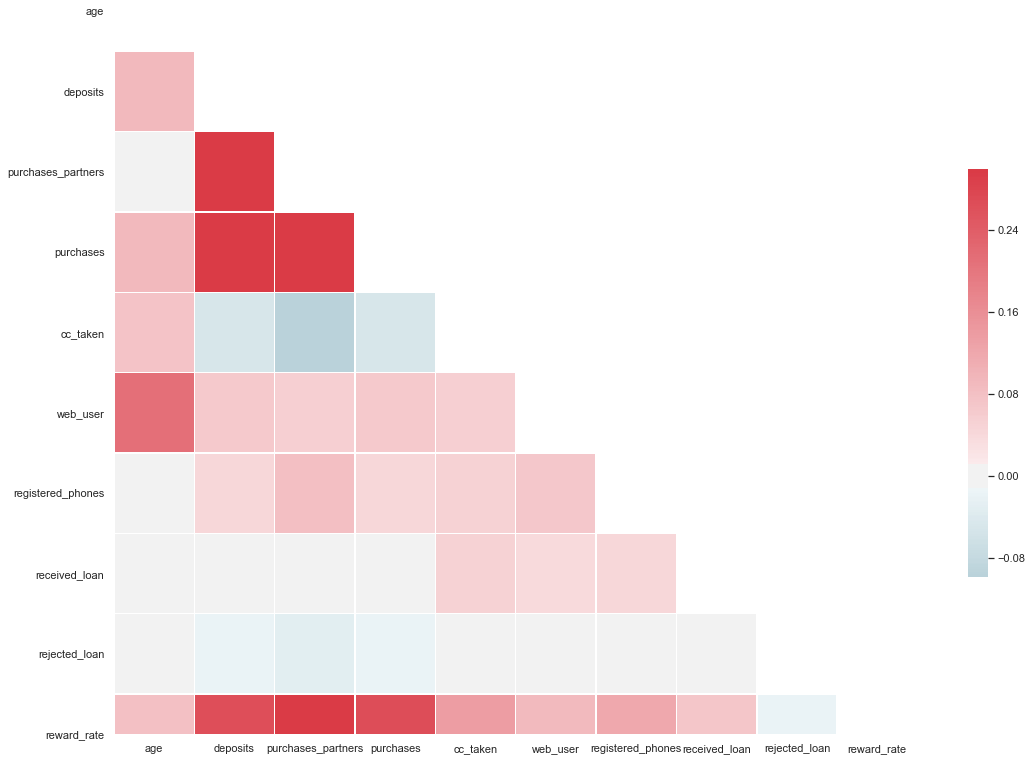

In [105]:
sns.set(style="white")
corr = X_train[X_train.columns[rfe.support_]].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Rebuilding model with selected parameters

In [106]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the results

In [107]:
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

## Checking the results

In [108]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # tp / (tp + fp)
recall = recall_score(y_test, y_pred) # tp / (tp + fn)
f1 = f1_score(y_test, y_pred)

In [109]:
print('Accuracy:',acc)
print('Precision: ',round(precision,4))
print('Recall_score:',round(recall,4))
print('f1_score:',round(f1,4))
cm

Accuracy: 0.6103703703703703
Precision:  0.5203
Recall_score: 0.7449
f1_score: 0.6127


array([[1632, 1534],
       [ 570, 1664]], dtype=int64)

## Validating the accuracy using kfold

In [110]:
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

SVM Accuracy: 0.645 (+/- 0.013)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model accuracy increased by 0.002 which is good but not that great.

## Analysing the coefficients

In [111]:
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.152529
1,deposits,0.991566
2,purchases_partners,-0.649263
3,purchases,-1.082266
4,cc_taken,0.107897
5,web_user,0.147122
6,registered_phones,0.118600
7,received_loan,0.111088
8,rejected_loan,0.111529
9,reward_rate,-0.171847


## Formatting the final results

In [112]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [113]:
#Check
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,0
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
